In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import os

In [2]:
# read dataframe
nb_seeds = 5
results_dir = "/storage/store2/work/aheurteb/mvicad/lbfgsb_results/"
save_name = f"lbfgsb_benchmark_{nb_seeds}_seeds.csv"
save_path = results_dir + save_name
df_res = pd.read_csv(save_path)

# Function to deserialize the arrays
def deserialize_array(file_path):
    return np.load(file_path)

# Apply the deserialization function to the DataFrame's columns containing file paths
output_dir = results_dir + f"{nb_seeds}_seeds"
col_2d_arrays = ['delays_lbfgsb', 'delays_mvicad', 'true_delays']
for col in col_2d_arrays:
    for i, arr in enumerate(df_res[col]):
        df_res[col][i] = deserialize_array(os.path.join(output_dir, f"{col}_array_{i}.npy"))

# Now, df_res contains the original 2D arrays in its cells

/tmp/ipykernel_38954/3915730894.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res[col][i] = deserialize_array(os.path.join(output_dir, f"{col}_array_{i}.npy"))


In [3]:
df_res[:5]

,amari_lbfgsb,amari_lbfgs_without_delay,amari_mvicad,amari_random,time_lbfgsb,time_lbfgs_without_delay,time_mvicad,delays_lbfgsb,delays_mvicad,true_delays,delay_error_lbfgsb,delay_error_mvicad,delay_error_random
0,0.002201,0.011910,0.001916,0.241671,76.754790,38.134508,0.160251,"[[-1.7221016, -1.3821474], [1.6066728, 2.63328...","[[-4, -4], [-1, 0], [-8, 1], [4, -10], [-1, 4]]","[[0, 0], [3, 4], [-5, 6], [8, -8], [2, 7]]",1.554943,3.6,6.655
1,0.000770,0.003161,0.000746,0.306199,78.187228,37.706355,0.238783,"[[3.491748, 0.40294605], [-4.5945787, 0.372063...","[[4, -3], [-4, -9], [2, -9], [3, 0], [-1, -9]]","[[0, 0], [-8, 8], [-2, 7], [-1, -6], [-5, 5]]",4.324994,7.6,7.160
2,0.000991,0.006066,0.001115,0.287699,79.921434,37.409235,0.136307,"[[0.018700195, -0.5749318], [-5.5421405, -0.41...","[[-1, 0], [-7, 0], [1, 1], [-4, 9], [4, -6]]","[[0, 0], [-6, 1], [2, 1], [-3, 10], [5, -5]]",0.675750,0.8,5.645
3,0.000412,0.011811,0.000409,0.257171,79.664889,37.797339,0.356497,"[[-5.1553254, -2.5085053], [3.5115488, 0.45663...","[[-6, -3], [3, 0], [1, -4], [-5, -1], [3, 3]]","[[0, 0], [9, 3], [7, -1], [1, 2], [9, 6]]",3.911699,4.5,6.300
4,0.000172,0.007748,0.000275,0.267185,79.914660,37.968862,0.393479,"[[-2.5281823, -0.34037912], [7.424601, 3.64815...","[[-5, -3], [5, 1], [-1, 1], [1, -10], [-10, 1]]","[[0, 0], [10, 4], [4, 4], [6, -8], [-6, 4]]",1.442557,3.8,5.925


In [4]:
# compute average random Amari distance and delay error
mean_amari_random = np.mean(df_res['amari_random'])
mean_delay_error_random = np.mean(df_res['delay_error_random'])

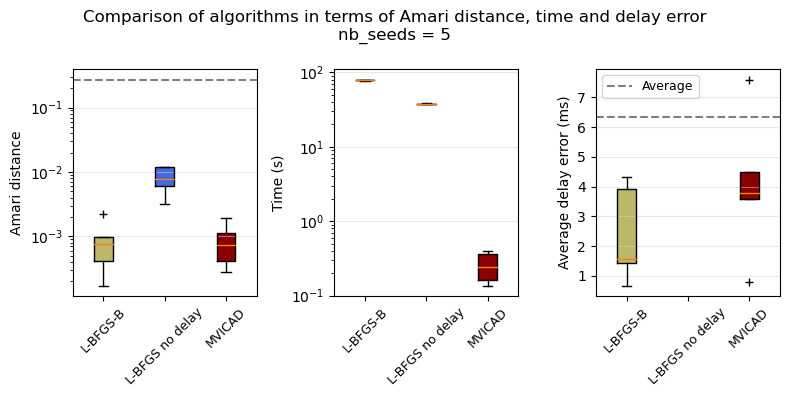

In [91]:
# plot
def one_subplot(data, ylabel, ax, logscale=False, average=None):
    bp = ax.boxplot(data)
    ax.set(ylabel=ylabel)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    plt.setp(bp['fliers'], color='red', marker='+')
    box_colors = ['darkkhaki', 'royalblue', 'darkred']
    nb_algos = len(data)
    for i in range(nb_algos):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i]))
    ax.set_xticklabels(['L-BFGS-B', 'L-BFGS no delay', 'MVICAD'], rotation=45, fontsize=9)
    if logscale is True:
        ax.set_yscale('log')
    if average is not None:
        ax.axhline(average, c='grey', linestyle='--')

fig, axs = plt.subplots(1, 3, figsize=(8, 4))

one_subplot(
    [df_res['amari_lbfgsb'], df_res['amari_lbfgs_without_delay'], df_res['amari_mvicad']], 
    'Amari distance', 
    axs[0], 
    logscale=True,
    average=mean_amari_random)
one_subplot(
    [df_res['time_lbfgsb'], df_res['time_lbfgs_without_delay'], df_res['time_mvicad']],
    'Time (s)',
    axs[1],
    logscale=True)
one_subplot(
    [df_res['delay_error_lbfgsb'], np.full(nb_seeds, np.nan), df_res['delay_error_mvicad']],
    'Average delay error (ms)',
    axs[2],
    average=mean_delay_error_random)

from matplotlib.lines import Line2D
plt.legend([Line2D([0], [0], linestyle='--', color='grey', lw=1.5)], ['Average'], fontsize=9)

plt.suptitle(f"Comparison of algorithms in terms of Amari distance, time and delay error\nnb_seeds = {nb_seeds}")
plt.tight_layout()

Remarks:
- maxiter=1000 and L-BFGS doesn't converge before the 1000th iteration; maybe it is too much and we can reduce it without reducing too much the Amari distance.
- I should inspect the loss at each iteration of L-BFGS(-B). Does it still decrease during the last iterations?
- I should plot the Amari distance for maxiter=10, 50, 100, 300, 1000. Does it decrease during the last iterations?
- I should vary m, p, n. Do we still find better delays?
- I should try to separate unmixing optimization and delay optimization. Can we reduce computation time without increasing Amari distance and delay error?